In [1]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2023-11-13 10:46:26--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  8.82MB/s    in 0.5s    

2023-11-13 10:46:27 (8.82 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [2]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
train = pd.read_csv("ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

epoch: 0, cost: 23.694176
epoch: 100, cost: 0.565073
epoch: 200, cost: 0.494867
epoch: 300, cost: 0.471927
epoch: 400, cost: 0.461065
epoch: 500, cost: 0.455315
epoch: 600, cost: 0.451806
epoch: 700, cost: 0.449341
epoch: 800, cost: 0.447428
epoch: 900, cost: 0.445988


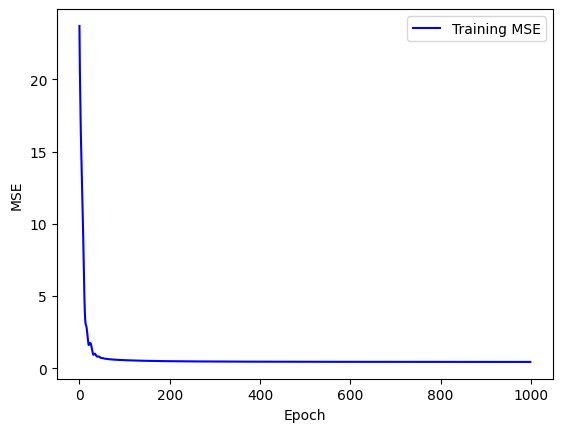

In [36]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.legend()
plt.show()

epoch: 0, cost: 23.572744
epoch: 100, cost: 0.570931
epoch: 200, cost: 0.497962
epoch: 300, cost: 0.473793
epoch: 400, cost: 0.462375
epoch: 500, cost: 0.456255
epoch: 600, cost: 0.452323
epoch: 700, cost: 0.449507
epoch: 800, cost: 0.447337
epoch: 900, cost: 0.445675


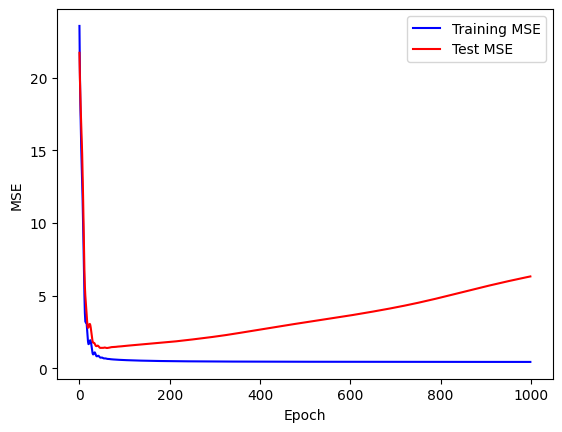

In [30]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    h_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(h_test, ratings_test)

    Y_test.append(cost_test.item())
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 24.051601, cost_test: 21.729534
epoch: 100, cost: 0.555357, cost_test: 1.138711
epoch: 200, cost: 0.489937, cost_test: 1.134967
epoch: 300, cost: 0.473375, cost_test: 1.154765
epoch: 400, cost: 0.467368, cost_test: 1.161309
epoch: 500, cost: 0.464344, cost_test: 1.163412
epoch: 600, cost: 0.462240, cost_test: 1.162963
epoch: 700, cost: 0.460768, cost_test: 1.166900
epoch: 800, cost: 0.459770, cost_test: 1.172716
epoch: 900, cost: 0.458966, cost_test: 1.179643


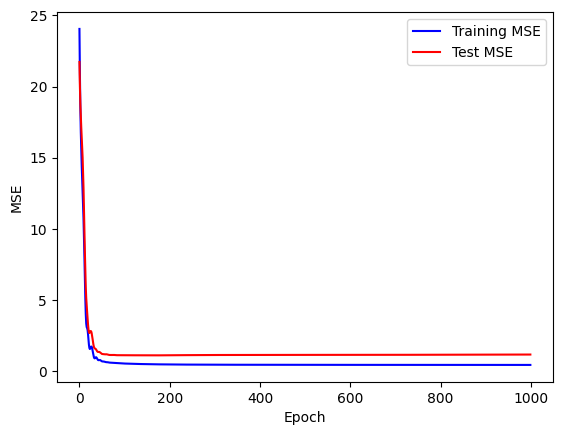

In [33]:
rank = 10
lambda1 = 0.1
lambda2 = 0.1
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)
  cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean()

  optimizer.zero_grad()
  cost_reg.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    h_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(h_test, ratings_test)

    Y_test.append(cost_test.item())
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}".format(epoch, cost.item(), cost_test))

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 13.241862, cost_test: 10.114515
epoch: 100, cost: 0.512955, cost_test: 1.058677
epoch: 200, cost: 0.473563, cost_test: 1.055904
epoch: 300, cost: 0.464642, cost_test: 1.064810
epoch: 400, cost: 0.461352, cost_test: 1.067396
epoch: 500, cost: 0.459973, cost_test: 1.069076
epoch: 600, cost: 0.459383, cost_test: 1.071474
epoch: 700, cost: 0.458973, cost_test: 1.072676
epoch: 800, cost: 0.458650, cost_test: 1.071212
epoch: 900, cost: 0.458410, cost_test: 1.069628


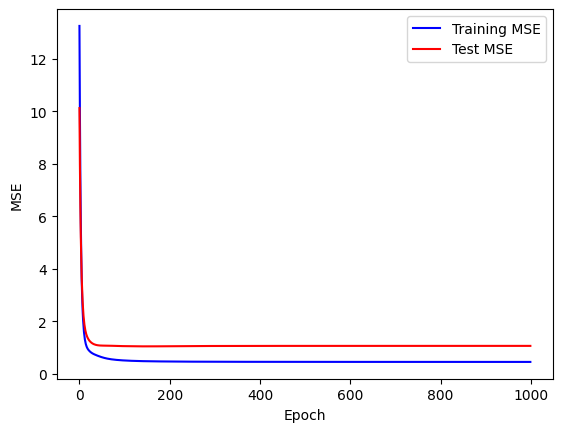

In [35]:
rank = 10
lambda1 = 0.2
lambda2 = 0.2
lambda3 = 0.2
lambda4 = 0.2
numItems = items.max() + 1
numUsers = users.max() + 1

mean = ratings.mean().item()

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

X = []
Y = []
Y_test = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis, ratings)
  cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean() + lambda3 * (bias_item ** 2).mean() + lambda4 * (bias_user ** 2).mean()

  optimizer.zero_grad()
  cost_reg.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    h_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(h_test, ratings_test)

    Y_test.append(cost_test.item())
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}, cost_test: {:.6f}".format(epoch, cost.item(), cost_test))

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()